In [256]:
from __future__ import division
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import brown
from nltk import bigrams, ngrams, trigrams 
from nltk.probability import FreqDist as FreqDist  
from collections import Counter
from string import digits
import operator
from collections import OrderedDict

In [257]:
def get_sentences(num_sentences):
    sentences= brown.sents()[:num_sentences]
    ret=[]
    for sentence in sentences:
        ret.append(' '.join(sentence))
    return ret

In [258]:
def preprocess_sents(sentences):
    sentences = [sentence.lower() for sentence in sentences]
    remove_digits = str.maketrans('', '', digits)
    sentences = [sentence.translate(remove_digits)  for sentence in sentences]
    sentences=[re.sub('\W+',' ', sentence) for sentence in sentences]
    return sentences

In [259]:
def plot(x,y,Title=''):
    plt.scatter(x,y)
    plt.title(Title)
    plt.show()

In [260]:
sents=get_sentences(40000)            # Get 40k sentences from the Brown corpus as mentioned in assignment

In [261]:
for sent in sents[:10]:
    print(sent)

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place .
The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted .
The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. .
`` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' .
The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' .
It recommended that Fulton legislators act `` to have th

In [262]:
sents=preprocess_sents(sents)      # Pre-processing converts strings to lower-case & removes numbers and special characters

In [263]:
for sent in sents[:10]:
    print(sent)

the fulton county grand jury said friday an investigation of atlanta s recent primary election produced no evidence that any irregularities took place 
the jury further said in term end presentments that the city executive committee which had over all charge of the election deserves the praise and thanks of the city of atlanta for the manner in which the election was conducted 
the september october term jury had been charged by fulton superior court judge durwood pye to investigate reports of possible irregularities in the hard fought primary which was won by mayor nominate ivan allen jr 
 only a relative handful of such reports was received the jury said considering the widespread interest in the election the number of voters and the size of this city 
the jury said it did find that many of georgia s registration and election laws are outmoded or inadequate and often ambiguous 
it recommended that fulton legislators act to have these laws studied and revised to the end of modernizing

In [264]:
def unigram_LM(sents):
    unigrams=[]
    for elem in sents:
        unigrams.extend(elem.split())

    unigram_counts=Counter(unigrams)
    unigram_total=len(unigrams)
    unigram_freq=dict()
    for word in unigram_counts:
        unigram_freq[word]=unigram_counts[word]/unigram_total

    return unigram_counts,unigram_freq

In [265]:
unigram_counts,unigram_freq=unigram_LM(sents)

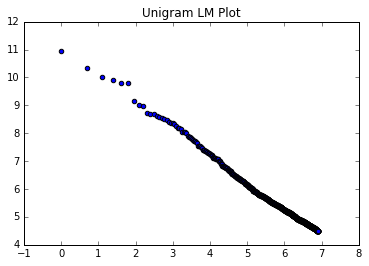

In [266]:
x=[np.log(i+1) for i in range(len(unigram_counts.most_common(1000)))]
y=np.asarray(list(np.log(y[1]) for y in unigram_counts.most_common(1000)))
plot(x,y,'Unigram LM Plot')

In [267]:
bigram_counts={}
for sent in sents:
    for w in ngrams(sent.split(),2, pad_left=True,pad_right=True):
        if(w not in bigram_counts):
            bigram_counts[w]=1
        else:
            bigram_counts[w]+=1

In [268]:
sorted_bigram_counts=sorted(bigram_counts.items(), key=operator.itemgetter(1),reverse=True)

[(('of', 'the'), 8512),
 ((None, 'the'), 5798),
 (('in', 'the'), 4986),
 (('to', 'the'), 2820),
 (('and', 'the'), 1848),
 (('on', 'the'), 1829),
 (('for', 'the'), 1592),
 ((None, 'in'), 1585),
 ((None, 'it'), 1578),
 ((None, 'he'), 1403),
 (('it', 'is'), 1390),
 (('to', 'be'), 1377),
 (('with', 'the'), 1261),
 (('that', 'the'), 1243),
 (('by', 'the'), 1205),
 (('of', 'a'), 1204),
 (('at', 'the'), 1178),
 (('from', 'the'), 1091),
 (('in', 'a'), 1082),
 ((None, 'this'), 1052),
 ((None, 'but'), 1038),
 ((None, 'a'), 956),
 (('as', 'a'), 879),
 ((None, 'and'), 831),
 (('is', 'a'), 820),
 (('is', 'the'), 759),
 ((None, 'i'), 729),
 (('it', 'was'), 692),
 (('as', 'the'), 664),
 (('with', 'a'), 649),
 ((None, 'they'), 614),
 ((None, 'there'), 598),
 ((None, 'if'), 589),
 (('the', 'first'), 584),
 (('for', 'a'), 566),
 (('will', 'be'), 566),
 (('of', 'his'), 563),
 (('to', 'a'), 561),
 (('he', 'was'), 555),
 (('has', 'been'), 551),
 (('one', 'of'), 550),
 ((None, 'we'), 550),
 (('have', 'been'

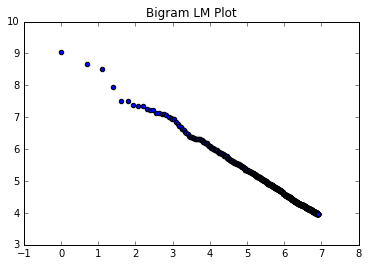

In [270]:
x=[np.log(i+1) for i in range(1000)]
y=np.asarray(list(np.log(y[1]) for y in sorted_bigram_counts[:1000]))
plot(x,y,'Bigram LM Plot')

In [271]:
def bigram_model(sentences):
    model={}
    for sent in sentences:
         for w1,w2 in ngrams(sent.split(),2, pad_left=True,pad_right=True):
            if w1 not in model:
                model[w1]={}
            if w2 not in model[w1]:
                model[w1][w2]=0
            model[w1][w2]+=1
    for w1 in model:
        tot_count=float(sum(model[w1].values()))
        for w2 in model[w1]:
            model[w1][w2]/=tot_count
     
    return model

bigram_LM= bigram_model(sents)

{'chartres': {None: 1.0},
 'seaquarium': {'and': 1.0},
 'awakens': {'the': 1.0},
 'account': {None: 0.14423076923076922,
  'and': 0.019230769230769232,
  'at': 0.019230769230769232,
  'before': 0.009615384615384616,
  'book': 0.009615384615384616,
  'books': 0.009615384615384616,
  'but': 0.009615384615384616,
  'by': 0.009615384615384616,
  'certainly': 0.009615384615384616,
  'every': 0.009615384615384616,
  'for': 0.2403846153846154,
  'he': 0.009615384615384616,
  'in': 0.009615384615384616,
  'is': 0.009615384615384616,
  'matters': 0.009615384615384616,
  'of': 0.375,
  'quantitatively': 0.009615384615384616,
  'reads': 0.009615384615384616,
  'such': 0.009615384615384616,
  'the': 0.04807692307692308,
  'thompson': 0.009615384615384616,
  'what': 0.009615384615384616},
 'attempt': {'as': 0.013157894736842105,
  'at': 0.05263157894736842,
  'failed': 0.013157894736842105,
  'in': 0.013157894736842105,
  'is': 0.039473684210526314,
  'it': 0.013157894736842105,
  'itself': 0.01315

In [272]:
trigram_counts={}
for sent in sents:
    for w in ngrams(sent.split(),3, pad_left=True,pad_right=True):
        if(w not in trigram_counts):
            trigram_counts[w]=1
        else:
            trigram_counts[w]+=1

In [273]:
sorted_trigram_counts=sorted(trigram_counts.items(), key=operator.itemgetter(1),reverse=True)

[((None, None, 'the'), 5798),
 ((None, None, 'in'), 1585),
 ((None, None, 'it'), 1578),
 ((None, None, 'he'), 1403),
 ((None, None, 'this'), 1052),
 ((None, None, 'but'), 1038),
 ((None, None, 'a'), 956),
 ((None, None, None), 920),
 ((None, None, 'and'), 831),
 ((None, None, 'i'), 729),
 ((None, None, 'they'), 614),
 ((None, None, 'there'), 598),
 ((None, None, 'if'), 589),
 ((None, 'it', 'is'), 577),
 ((None, None, 'we'), 550),
 ((None, None, 'for'), 539),
 ((None, None, 'as'), 448),
 ((None, None, 'when'), 404),
 ((None, 'in', 'the'), 398),
 ((None, None, 'to'), 396),
 (('it', None, None), 393),
 ((None, None, 'one'), 352),
 (('one', 'of', 'the'), 337),
 (('the', 'united', 'states'), 336),
 ((None, None, 'these'), 330),
 ((None, None, 'at'), 300),
 ((None, None, 'his'), 296),
 ((None, 'it', 'was'), 284),
 ((None, None, 'on'), 273),
 ((None, None, 'she'), 268),
 ((None, None, 'that'), 267),
 ((None, None, 'what'), 265),
 (('him', None, None), 263),
 (('them', None, None), 240),
 (('a

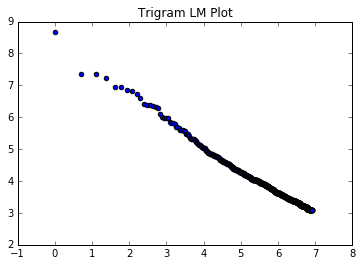

In [275]:
x=[np.log(i+1) for i in range(1000)]
y=np.asarray(list(np.log(y[1]) for y in sorted_trigram_counts[:1000]))
plot(x,y,'Trigram LM Plot')

In [276]:
def trigram_model(sentences):
    model={}
    for sent in sentences:
         for w1,w2,w3 in ngrams(sent.split(),3, pad_left=True,pad_right=True):
            if (w1,w2) not in model:
                model[(w1,w2)]={}
            if w3 not in model[(w1,w2)]:
                model[(w1,w2)][w3]=0
            model[(w1,w2)][w3]+=1
    for (w1,w2) in model:
        tot_count=float(sum(model[(w1,w2)].values()))
        for w3 in model[(w1,w2)]:
            model[(w1,w2)][w3]/=tot_count
     
    return model

trigram_LM= trigram_model(sents)

{('for', 'ernest'): {'arbogast': 1.0},
 ('jr', 'chose'): {'a': 1.0},
 ('stripes', 'down'): {'the': 1.0},
 ('concession', None): {None: 1.0},
 ('earth', 'bound'): {'race': 1.0},
 ('white', 'brocade'): {'gown': 1.0},
 ('no', 'considerations'): {'justify': 1.0},
 ('feel', 'at'): {'home': 1.0},
 ('perfectly', 'willing'): {'to': 1.0},
 ('hypothalamus', 'was'): {'demonstrated': 1.0},
 ('units', 'was'): {'that': 1.0},
 ('companion', 'but'): {'his': 1.0},
 ('in', 'rooms'): {'which': 1.0},
 ('services', 'are'): {'built': 0.2,
  'given': 0.2,
  'held': 0.2,
  'of': 0.2,
  'to': 0.2},
 ('of', 'refining'): {'the': 1.0},
 ('ante', 'bellum'): {'culture': 0.3333333333333333,
  'southern': 0.3333333333333333,
  'way': 0.3333333333333333},
 ('maid', 'have'): {'been': 1.0},
 ('against', 'minority'): {'groups': 1.0},
 ('reacts', 'upon'): {'and': 1.0},
 ('he', 'contacted'): {'a': 1.0},
 ('studied', 'conviction'): {'that': 1.0},
 ('or', 'deterrent'): {'example': 1.0},
 ('amazed', 'angry'): {None: 1.0},
 ('

In [277]:
def get_test_sentences(filename='test_examples.txt'):
    sents=list()
    with open(filename,'r') as f:
        for line in f:
            sents.append(line)
        f.close()
    return sents

In [278]:
test_sents=get_test_sentences()

In [291]:
test_unigram_arr=[]
print('Unigram test probabilities: ')
print()
for sent in test_sents:
    p_val=np.prod([unigram_freq.get(word,0) for word in sent.split()])
    test_unigram_arr.append(p_val)
    print('The sequence \"'+sent+' \" has unigram probablity of '+ str(p_val))


Unigram test probabilities: 

The sequence "he lived a good life
 " has unigram probablity of 6.83737975572e-15
The sequence "the man was happy
 " has unigram probablity of 4.18357043332e-11
The sequence "the person was good
 " has unigram probablity of 7.4020116587e-11
The sequence "the girl was sad
 " has unigram probablity of 1.50483731387e-12
The sequence "he won the war " has unigram probablity of 3.39221909697e-11


In [280]:
test_bigram_arr=[]
for sent in test_sents:
    p_val=1
    for w1,w2 in bigrams(sent.split(),pad_left=True,pad_right=True):
        if w1 in bigram_LM:
            p_val*=bigram_LM[w1].get(w2,0)
        else:
            p_val=0
    print('The sequence \"'+ sent +'\" has bigram probablity of '+ str(p_val))
    test_bigram_arr.append(p_val)

The sequence "he lived a good life
" has bigram probablity of 2.1052888606948063e-12
The sequence "the man was happy
" has bigram probablity of 2.6228190453133953e-10
The sequence "the person was good
" has bigram probablity of 1.629795454140142e-11
The sequence "the girl was sad
" has bigram probablity of 0.0
The sequence "he won the war" has bigram probablity of 1.9035467829928683e-09


In [281]:
test_trigram_arr=[]
print('Trigram test probabilities: ')
for sent in test_sents:
    p_val=1
    for w1,w2,w3 in trigrams(sent.split(),pad_left=True,pad_right=True):
        try:
            p_val*=trigram_LM[(w1,w2)][w3]
        except Exception as e:
            p_val=0
            break
    print('The sequence \"'+ sent +'\" has trigram probablity of '+ str(p_val))
    
    test_trigram_arr.append(p_val)

Trigram test probabilities: 
The sequence "he lived a good life
" has trigram probablity of 0
The sequence "the man was happy
" has trigram probablity of 0
The sequence "the person was good
" has trigram probablity of 0
The sequence "the girl was sad
" has trigram probablity of 0
The sequence "he won the war" has trigram probablity of 6.620295176894287e-08


In [290]:
sum(trigram_LM[('the','girl')].values())

0.9999999999999998